In [80]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [82]:
df = pd.read_csv('Telco_Customer_Dataset.csv')

**Exploratory Data Analysis**

In [3]:
#to show all columns
pd.options.display.max_columns = None

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.sample().T

,3877
customerID,2898-LSJGD
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,21
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [83]:
df['SeniorCitizen']= df['SeniorCitizen'].astype(object)

In [84]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [12]:
df.describe().T.style.background_gradient(cmap='RdPu',subset=['mean','std','max','min']) 

,count,mean,std,min,25%,50%,75%,max
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7032.000000,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000


In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [85]:
#you can look more carefully and notice 
#This customers stayed 0 month with us in this way MonthlyCharges = TotalCharges for them
df[["tenure","MonthlyCharges","TotalCharges"]].sort_values(by=['tenure'], ascending=True).head(15)

,tenure,MonthlyCharges,TotalCharges
1340,0,56.05,NaN
936,0,80.85,NaN
6670,0,73.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
3826,0,25.35,NaN
753,0,20.25,NaN
6754,0,61.90,NaN
3331,0,19.85,NaN
488,0,52.55,NaN


In [86]:
#fill the null rows with MonthlyCharges
df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"])

In [7]:
df.duplicated().sum()

0

In [17]:
df.drop_duplicates(keep=False, inplace=True)

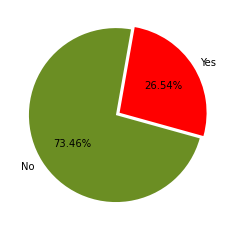

In [18]:
colors = ['olivedrab','red'] 
ax = (df['Churn'].value_counts()*100.0 /len(df))
label = ax.index

#create pie chart
plt.pie(ax, explode=[0,0.05], labels=label, colors = colors, autopct='%2.2f%%', startangle= 80)
plt.show()

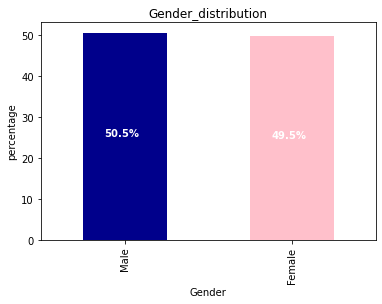

In [23]:
fig = (df['gender'].value_counts(normalize=True) * 100).plot(kind='bar', color=['darkblue','pink'])
fig.set_xlabel('Gender')
fig.set_ylabel('percentage')
fig.set_title('Gender_distribution')

for patch in fig.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    # value, (x, y)
    fig.annotate('{}%'.format(round(height, 1)), (x+0.25*width, y+0.5*height), color='white', weight='bold')

In [87]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [88]:
#Drop the gender column because it is already examined
df.drop('gender', axis=1, inplace=True)

In [89]:
#Drop the customerID column because it is not important not depend variable
df.drop('customerid', axis=1, inplace=True)

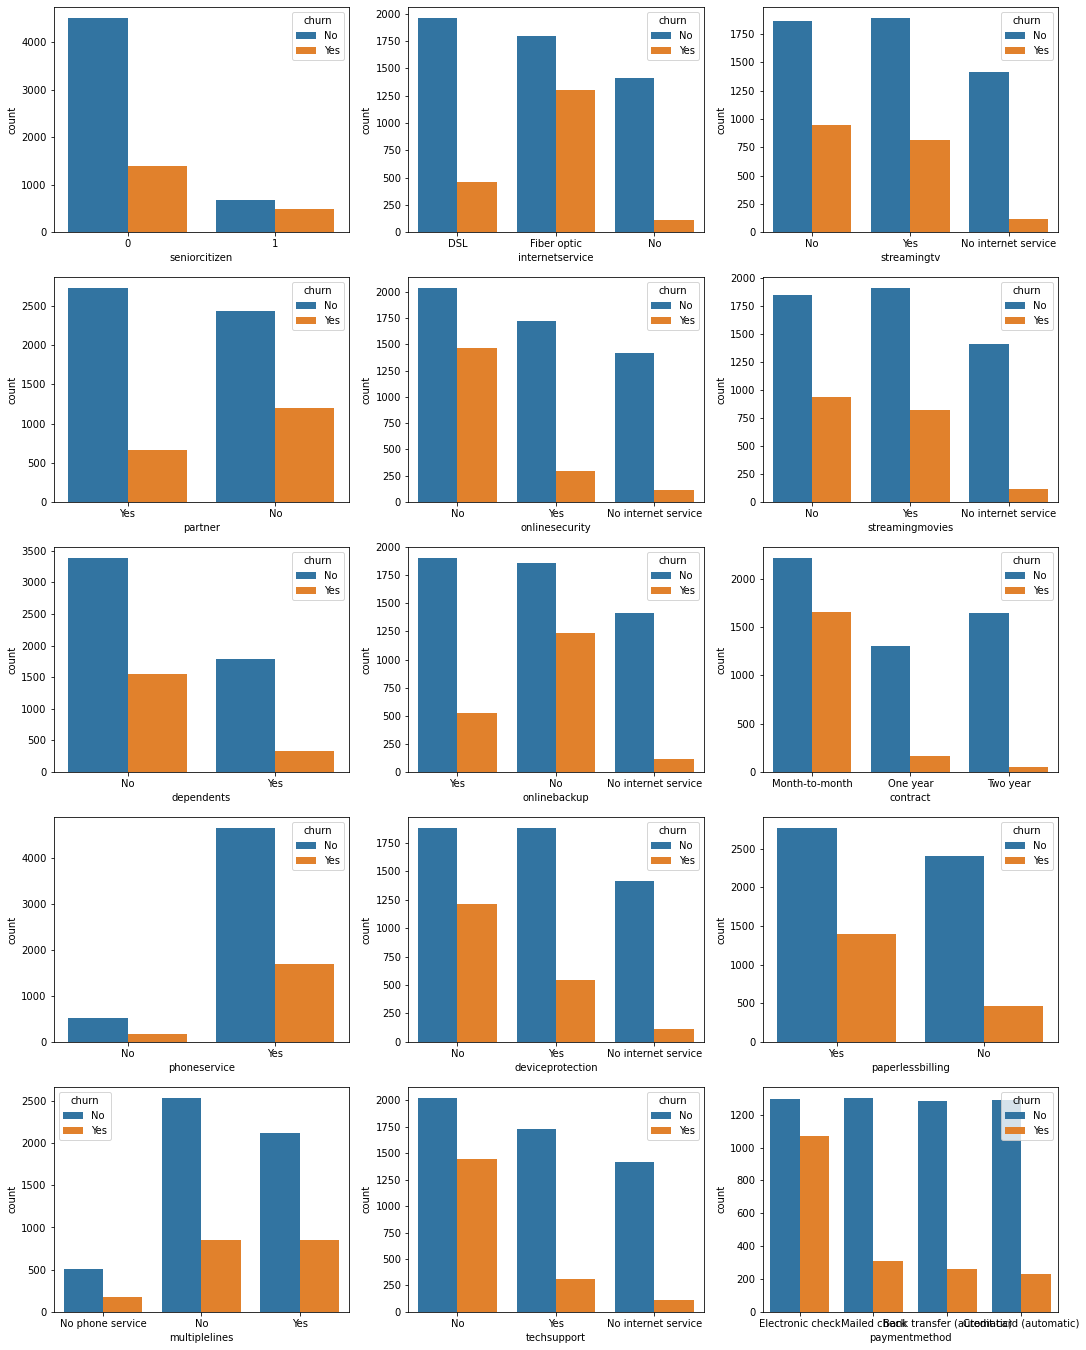

In [90]:
cat_cols = df.drop(['churn'], axis=1).select_dtypes(include='object').columns
fig, axes = plt.subplots(nrows = 5,ncols = 3,figsize = (18,24))

for i, item in enumerate(cat_cols): 
    if i < 5:
        ax = sns.countplot(x=item, data=df, ax=axes[i,0], hue='churn') #Show value counts for two cat_variables
        
    elif i >=5 and i < 10:
        ax = sns.countplot(x=item, data=df, ax=axes[i-5,1], hue='churn')
        
    else:
        ax = sns.countplot(x=item, data=df, ax=axes[i-10,2], hue='churn')

Text(0.5, 1.0, 'Churn by Contract Type')

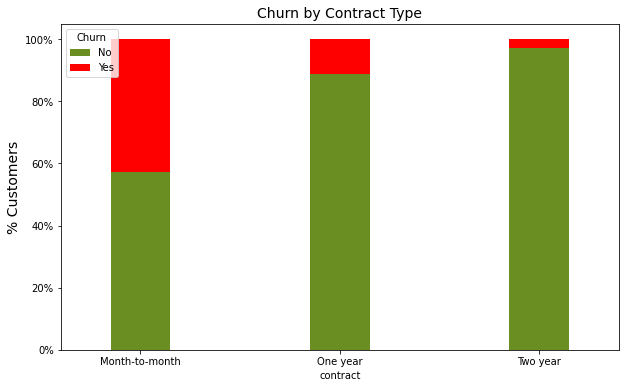

In [91]:
#Contact time  by Churn 
contact_churn = df.groupby(['contract', 'churn']).size().unstack()  
colors = ['olivedrab','red']
ax = (contact_churn.T*100.0/contact_churn.T.sum()).T.plot(kind='bar', width=0.3,color=colors, stacked=True, rot=0, figsize= (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

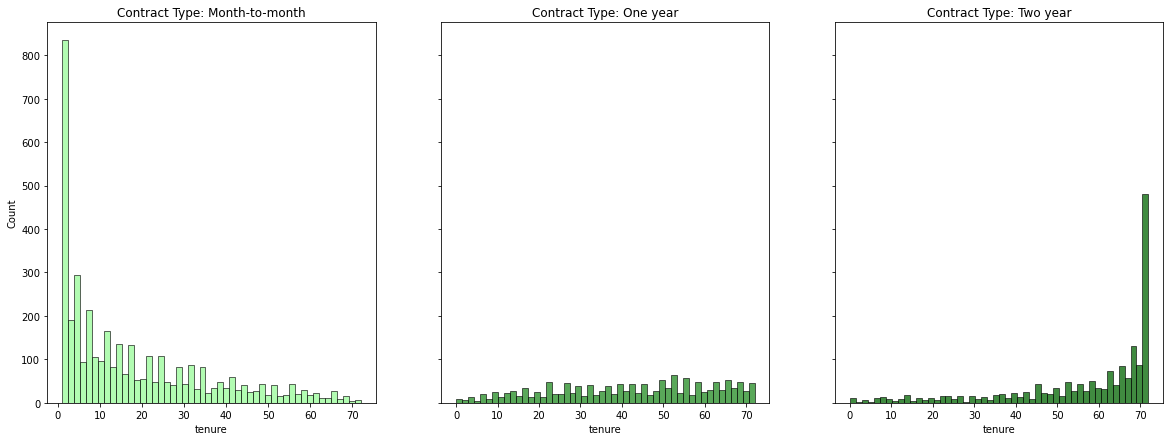

In [93]:
#Tenure by Contract Type

fig, axs = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize=(20,7))

colors=['palegreen','forestgreen','darkgreen']

cols = ['Month-to-month', 'One year', 'Two year']

for i, col in enumerate(cols):
    ax = sns.histplot(df[df['contract'] == col]['tenure'], kde = False, bins = 50, ax = axs[i], color = colors[i])
    ax.set_title('Contract Type: ' + col)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

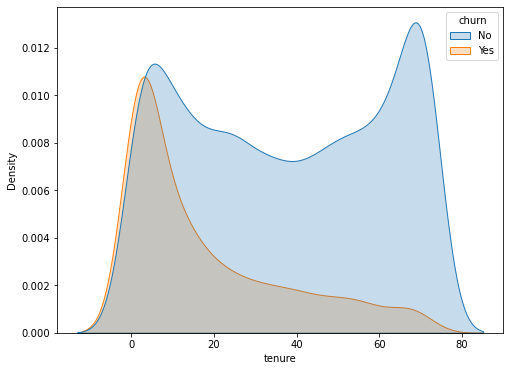

In [94]:
plt.figure(figsize=(8, 6))
ax.legend(["Not Churn","Churn"],loc='upper right')
sns.kdeplot(x='tenure', hue='churn', data=df, shade=True, color="blue")

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

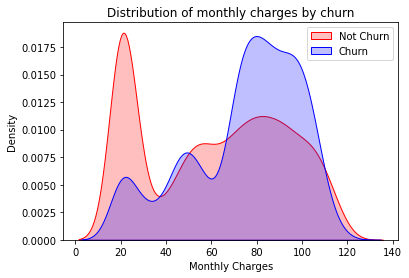

In [96]:
ax = sns.kdeplot(df.monthlycharges[(df["churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.monthlycharges[(df["churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

### Feature Engineering

In [98]:
df['churn'].replace(to_replace='Yes', value=1, inplace=True)
df['churn'].replace(to_replace='No', value=0, inplace=True)

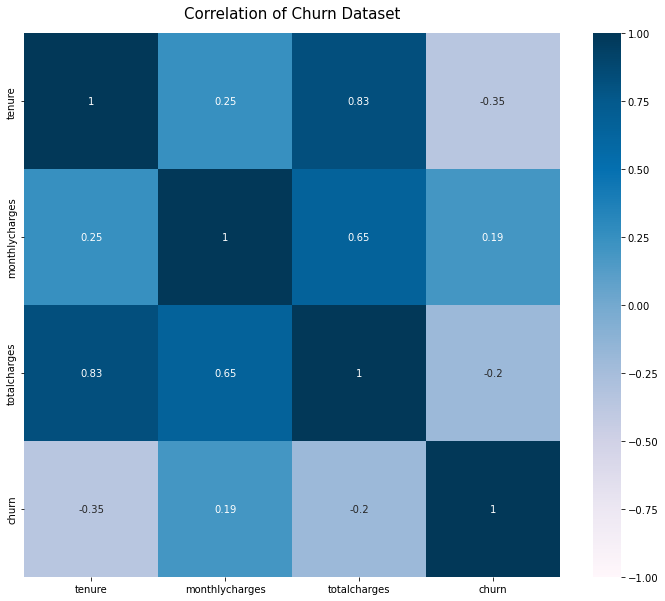

In [99]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = plt.cm.PuBu)
p.set_title('Correlation of Churn Dataset', fontdict={'fontsize':15}, pad=15);

In [105]:
df.columns

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'churn'],
      dtype='object')

In [106]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,monthlycharges,totalcharges,churn,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

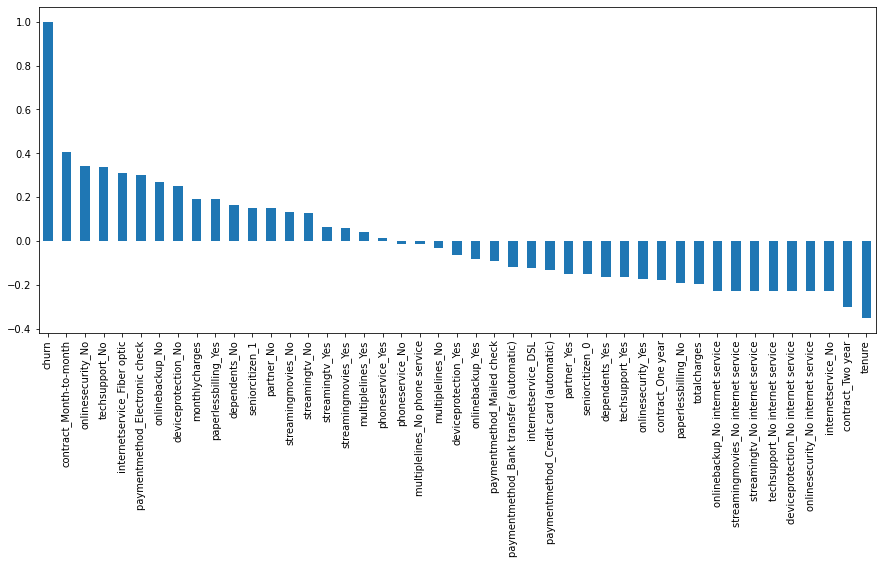

In [102]:
plt.figure(figsize=(15,6))
df_dummies.corr()['churn'].sort_values(ascending=False).plot(kind='bar') 

In [112]:
# Select Categorical variables
df_cat = df.select_dtypes(include = ['object'])
df_cat_cols = df_cat.columns

# if not drop 'churn' and 'customerid' please check it and drop
#select Numeric variavles
df_num = df.select_dtypes(include = ['int64','int32','float64'])

#Drop Churn variable that independent variable 
df_num = df_num.drop(columns=['churn'])

In [113]:
for i in df_cat: 
    df_cat = pd.concat([df_cat,pd.get_dummies(df_cat[str(i)],drop_first=True,prefix=str(i))],axis=1)
    #prefix: change variable name
    #drop_first: reduce variable n to n-1

In [114]:
df_cat

,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,...,0,0,0,0,0,0,1,0,1,0
1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,...,0,0,0,0,1,0,0,0,0,1
2,0,No,No,Yes,No,DSL,Yes,Yes,No,No,...,0,0,0,0,0,0,1,0,0,1
3,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
4,0,No,No,Yes,No,Fiber optic,No,No,No,No,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,...,0,1,0,1,1,0,1,0,0,1
7039,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,...,0,1,0,1,1,0,1,1,0,0
7040,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,...,0,0,0,0,0,0,1,0,1,0
7041,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,...,0,0,0,0,0,0,1,0,0,1


In [115]:
#Drop categorical columns 
df_cat = df_cat.drop(columns=df_cat_cols)

In [116]:
df_cat

,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,0,1,0,0,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,1,1,1,0,1,1,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [117]:
df_num

,tenure,monthlycharges,totalcharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [118]:
from sklearn.preprocessing import MinMaxScaler

features = df_num.columns.values
scaler = MinMaxScaler(feature_range = (0,1)) #normalize 0-1
scaler.fit(df_num) 
df_num = pd.DataFrame(scaler.transform(df_num))
df_num.columns = features

In [63]:
features

array(['tenure', 'monthlycharges', 'totalcharges'], dtype=object)

In [120]:
df["churn"] = df["churn"].replace({"Yes":1,"No":0})

# get target
y = df['churn'] 

#merge all columns and get inputs
X = pd.concat([df_num,df_cat],axis=1) 

X.head()

,tenure,monthlycharges,totalcharges,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.013889,0.115423,0.001275,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0.215867,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.027778,0.354229,0.010310,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0.210241,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.027778,0.521891,0.015330,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### Feature Importance

In [252]:
#pip install boruta

     |████████████████████████████████| 56 kB 426 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [121]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [122]:
forest = RandomForestClassifier(n_estimators=200)
forest.fit(X, y)

RandomForestClassifier(n_estimators=200)

<AxesSubplot:>

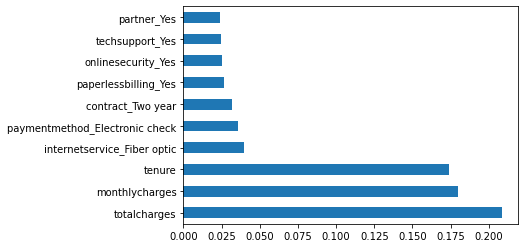

In [123]:
feature_imp = pd.Series(forest.feature_importances_, index= X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [124]:
from boruta import BorutaPy

X = X.to_numpy()
y = y.to_numpy()

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	26


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	26


In [125]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(df.columns,  feat_selector.ranking_,  feat_selector.support_))

In [126]:
# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: seniorcitizen             Rank: 1,  Keep: True
Feature: partner                   Rank: 1,  Keep: True
Feature: dependents                Rank: 1,  Keep: True
Feature: tenure                    Rank: 11,  Keep: False
Feature: phoneservice              Rank: 10,  Keep: False
Feature: multiplelines             Rank: 13,  Keep: False
Feature: internetservice           Rank: 26,  Keep: False
Feature: onlinesecurity            Rank: 27,  Keep: False
Feature: onlinebackup              Rank: 12,  Keep: False
Feature: deviceprotection          Rank: 2,  Keep: False
Feature: techsupport               Rank: 25,  Keep: False
Feature: streamingtv               Rank: 22,  Keep: False
Feature: streamingmovies           Rank: 5,  Keep: False
Feature: contract                  Rank: 24,  Keep: False
Feature: paperlessbilling          Rank: 9,  Keep: False
Feature: paymentmethod             Rank: 21,  Keep: False
Feature: monthlycharges            Rank: 14,  Keep: False
Feature: totalcharges  